# はじめに

急にムラムラしてきたので、xyY の Color Volume をプロットしてみる。<br>
初の3次元プロットだけど上手くいくかしら？

# やり方

大きく2通りある。

1. R, G, B を 0～255 まで振って $2^{24}$ 通りの xyY をプロットする
2. gamut 内部を 100x100 くらいでサンプリングして、各点でYが最大となるRGBの組を求め、それを xyY に変換する

1.のやり方を「全網羅」、2.のやり方を「外面」と呼ぶことにする。

# 全網羅 方式

0～255 はあまり意味ないので、0～1 でやりましょう。

```
r = np.linspace(0, 1, 256)
g = np.linspace(0, 1, 256)
b = np.linspace(0, 1, 256)
```

的な感じで。

# 外面 方式

こちらは少々面倒くさい。

1. xy 平面上を 100x100 くらいでサンプリングする。
2. 各点が gamut の領域内か判定。領域内なら配列に入れる。
3. 領域内の xy ペア を $Y=1$で xyY --> RGBに変換。この時、RGBが1.0 を超えた場合は max が 1.0 となるよう正規化する。
4. 正規化した RGB 値を xyY に変換。そしてプロット。

# で、どれを実装するの？

面白そうな外面方式を組んで見る。

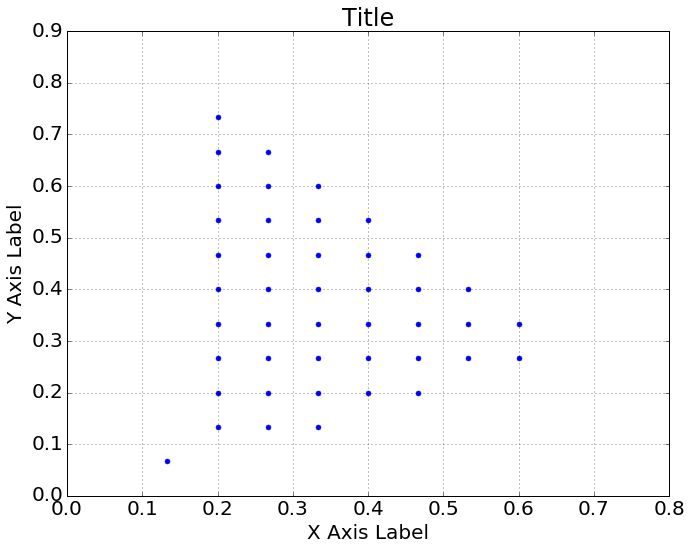

In [30]:
# エリア内のxyを算出
# ---------------------
%matplotlib inline
import plor_color_gamut as pcg
import color_convert as ccv
import imp
imp.reload(pcg)
gamut = ccv.const_rec2020_xy
white = ccv.const_d65_large_xyz
div_num = 16
large_y = 100
xy = pcg.get_xy_inside_gamut(gamut=gamut, div_num=div_num)

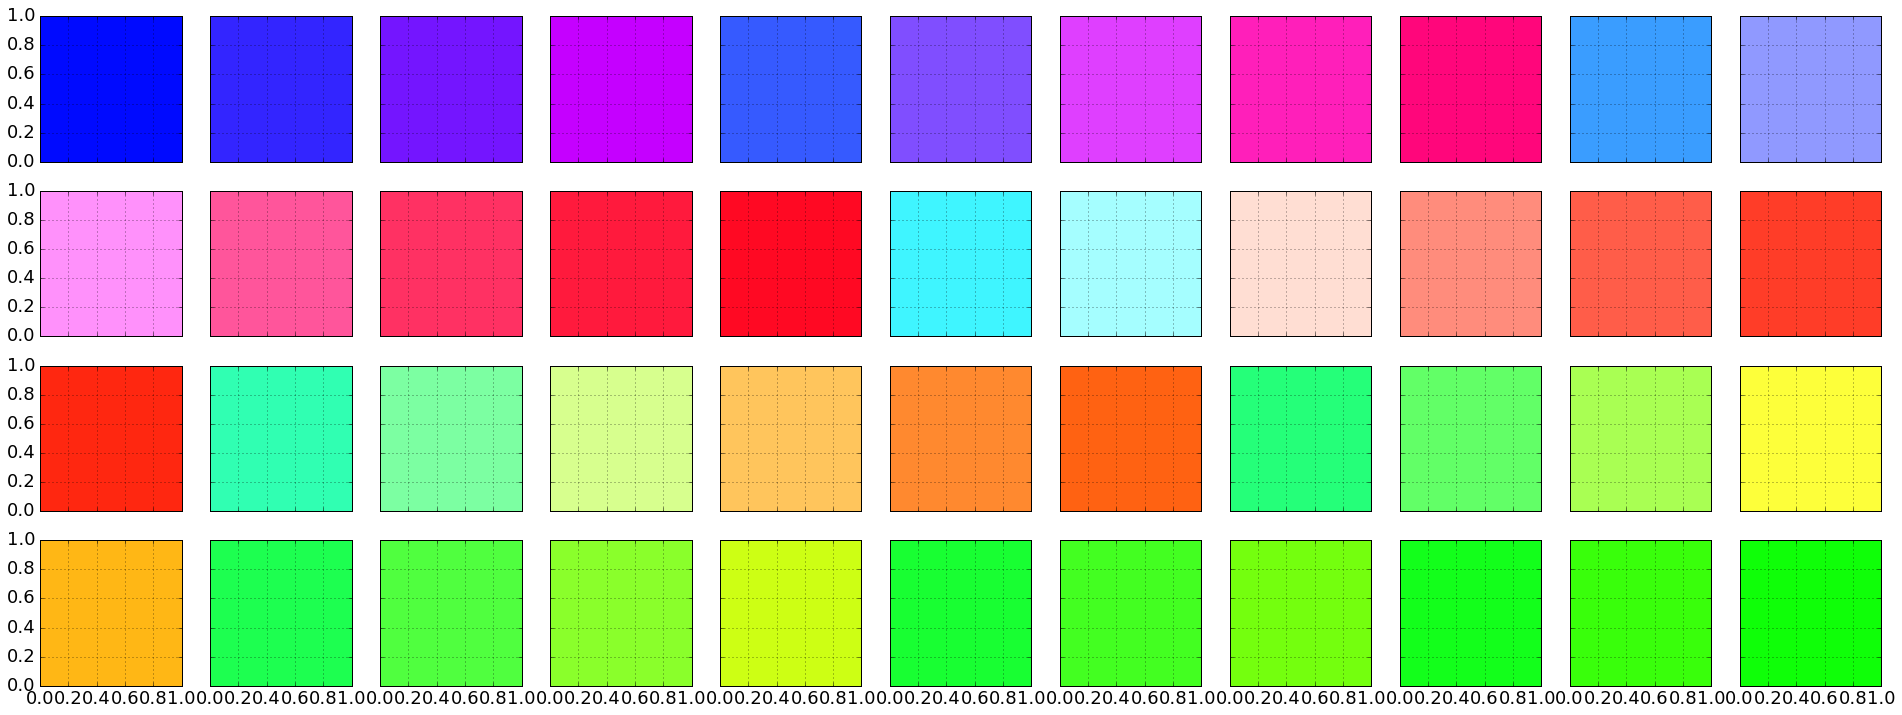

In [19]:
# RGB値をパッチとして表示
# ------------------------
%matplotlib inline
import plor_color_gamut as pcg
import color_convert as ccv
import imp
imp.reload(pcg)
gamut = ccv.const_rec2020_xy
white = ccv.const_d65_large_xyz
div_num = 16
large_y = 100
xy = pcg.get_xy_inside_gamut(gamut=gamut, div_num=div_num)
rgb = pcg.get_max_rgb_from_xy(xy, gamut=gamut, white=white, large_y=0.01)
pcg.plot_rgb_patch(rgb)

In [22]:
# RGB --> XYZ
# ------------------------
%matplotlib inline
import plor_color_gamut as pcg
import color_convert as ccv
import imp
imp.reload(pcg)
gamut = ccv.const_rec2020_xy
white = ccv.const_d65_large_xyz
div_num = 16
large_y = 100
xy = pcg.get_xy_inside_gamut(gamut=gamut, div_num=div_num)
rgb = pcg.get_max_rgb_from_xy(xy, gamut=gamut, white=white, large_y=0.01)
large_xyz = pcg.get_large_xyz_from_rgb(rgb, large_y_rate=large_y,
                                       gamut=gamut, white=white)
print(large_xyz)

[[[ 0.17698851  0.08849426  1.06193108]
  [ 0.31947446  0.21298297  1.06491486]
  [ 0.47249151  0.23624575  1.06310589]
  [ 0.66303331  0.26521333  1.0608533 ]
  [ 0.35691608  0.35691608  1.07074824]
  [ 0.53471105  0.40103329  1.0694221 ]
  [ 0.76265849  0.45759509  1.06772188]
  [ 0.77800166  0.38900083  0.77800166]
  [ 0.72299694  0.30985583  0.51642639]
  [ 0.40429892  0.53906522  1.07813045]
  [ 0.61580232  0.61580232  1.07765407]
  [ 0.88653843  0.70923075  1.06384612]
  [ 0.78846014  0.52564009  0.65705011]
  [ 0.73071747  0.41755284  0.41755284]
  [ 0.69267175  0.34633588  0.25975191]
  [ 0.66571306  0.29587247  0.14793623]
  [ 0.46618833  0.77698055  1.08777277]
  [ 0.72588614  0.90735768  1.08882921]
  [ 0.90291541  0.90291541  0.90291541]
  [ 0.79920362  0.66600302  0.53280241]
  [ 0.73860467  0.52757477  0.31654486]
  [ 0.69886172  0.43678857  0.17471543]
  [ 0.67078868  0.37266038  0.07453208]
  [ 0.38493386  0.76986771  0.76986771]
  [ 0.56250207  0.8437531   0.70312758]


In [31]:
# XYZ --> xyY
# ------------------------
%matplotlib inline
import plor_color_gamut as pcg
import color_convert as ccv
import imp
imp.reload(pcg)
gamut = ccv.const_rec2020_xy
white = ccv.const_d65_large_xyz
div_num = 16
large_y = 100
xy = pcg.get_xy_inside_gamut(gamut=gamut, div_num=div_num)
rgb = pcg.get_max_rgb_from_xy(xy, gamut=gamut, white=white, large_y=0.01)
large_xyz = pcg.get_large_xyz_from_rgb(rgb, large_y_rate=large_y,
                                       gamut=gamut, white=white)
xyY = pcg.get_xyY_from_large_xyz(large_xyz)
print(xyY)

[[[ 0.13333333  0.06666667  0.08849426]
  [ 0.2         0.13333333  0.21298297]
  [ 0.26666667  0.13333333  0.23624575]
  [ 0.33333333  0.13333333  0.26521333]
  [ 0.2         0.2         0.35691608]
  [ 0.26666667  0.2         0.40103329]
  [ 0.33333333  0.2         0.45759509]
  [ 0.4         0.2         0.38900083]
  [ 0.46666667  0.2         0.30985583]
  [ 0.2         0.26666667  0.53906522]
  [ 0.26666667  0.26666667  0.61580232]
  [ 0.33333333  0.26666667  0.70923075]
  [ 0.4         0.26666667  0.52564009]
  [ 0.46666667  0.26666667  0.41755284]
  [ 0.53333333  0.26666667  0.34633588]
  [ 0.6         0.26666667  0.29587247]
  [ 0.2         0.33333333  0.77698055]
  [ 0.26666667  0.33333333  0.90735768]
  [ 0.33333333  0.33333333  0.90291541]
  [ 0.4         0.33333333  0.66600302]
  [ 0.46666667  0.33333333  0.52757477]
  [ 0.53333333  0.33333333  0.43678857]
  [ 0.6         0.33333333  0.37266038]
  [ 0.2         0.4         0.76986771]
  [ 0.26666667  0.4         0.8437531 ]


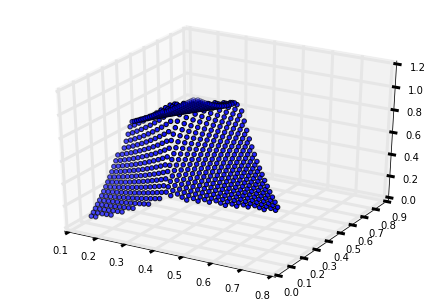

In [34]:
# plot_xyY
# ------------------------
%matplotlib inline
import plor_color_gamut as pcg
import color_convert as ccv
import imp
imp.reload(pcg)
gamut = ccv.const_rec2020_xy
white = ccv.const_d65_large_xyz
div_num = 64
large_y = 100
xy = pcg.get_xy_inside_gamut(gamut=gamut, div_num=div_num)
rgb = pcg.get_max_rgb_from_xy(xy, gamut=gamut, white=white, large_y=0.01)
large_xyz = pcg.get_large_xyz_from_rgb(rgb, large_y_rate=large_y,
                                       gamut=gamut, white=white)
xyY = pcg.get_xyY_from_large_xyz(large_xyz)
pcg.plot_xyY(xyY)